# Object Detection
In this notebook, state-of-the-art models for object detection are used on some example images. First, Faster R-CNN will be covered. Subsequently, YOLO will be used for object detection.

In [1]:
# Imports
import cv2
import torch
import argparse
import numpy as np
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

## Faster R-CNN


The pre-trained Faster R-CNN model will be loaded here. The model has a ResNet50 base network and will be loaded from the torchvision module. The min_size argument denotes the minimum dimensions of the bounding boxes that surround the objects. Making this value smaller will result in more small object to be detected.  

In [2]:
# Load pretrained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, min_size=800)

# This model is trained to detect the following classes
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

C:\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\matth/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|                                                                                                                   | 0.00/160M [00:00<?, ?B/s]

  1%|▋                                                                                                          | 960k/160M [00:00<00:17, 9.58MB/s]

  2%|█▋                                                                                                        | 2.55M/160M [00:00<00:12, 13.5MB/s]

  3%|██▋                                                                                                       | 4.01M/160M [00:00<00:11, 14.2MB/s]

  3%|███▌                                                                                                      | 5.37M/160M [00:00<00:13, 12.2MB/s]

  4%|████▍                                                                                                     | 6.75M/160M [00:00<00:12, 12.9MB/s]

  5%|█████▌                                                                                                    | 8.30M/160M [00:00<00:11, 13.9MB/s]

  6%|██████▍                                                                                                   | 9.75M/160M [00:00<00:11, 14.3MB/s]

  7%|███████▌                                                                                                  | 11.4M/160M [00:00<00:10, 15.0MB/s]

  8%|████████▌                                                                                                 | 12.8M/160M [00:00<00:10, 15.0MB/s]

  9%|█████████▍                                                                                                | 14.3M/160M [00:01<00:10, 14.7MB/s]

 10%|██████████▍                                                                                               | 15.7M/160M [00:01<00:10, 14.6MB/s]

 11%|███████████▍                                                                                              | 17.2M/160M [00:01<00:10, 14.8MB/s]

 12%|████████████▎                                                                                             | 18.6M/160M [00:01<00:09, 14.8MB/s]

 13%|█████████████▎                                                                                            | 20.0M/160M [00:01<00:09, 14.8MB/s]

 13%|██████████████▎                                                                                           | 21.5M/160M [00:01<00:09, 15.0MB/s]

 14%|███████████████▏                                                                                          | 22.9M/160M [00:01<00:09, 14.7MB/s]

 15%|████████████████▏                                                                                         | 24.4M/160M [00:01<00:09, 14.3MB/s]

 16%|█████████████████                                                                                         | 25.7M/160M [00:01<00:09, 14.2MB/s]

 17%|██████████████████                                                                                        | 27.2M/160M [00:01<00:09, 14.6MB/s]

 18%|██████████████████▉                                                                                       | 28.6M/160M [00:02<00:09, 14.0MB/s]

 19%|███████████████████▉                                                                                      | 30.0M/160M [00:02<00:10, 13.6MB/s]

 20%|████████████████████▉                                                                                     | 31.5M/160M [00:02<00:09, 14.1MB/s]

 21%|█████████████████████▊                                                                                    | 32.9M/160M [00:02<00:09, 14.3MB/s]

 21%|██████████████████████▊                                                                                   | 34.3M/160M [00:02<00:10, 13.1MB/s]

 22%|███████████████████████▋                                                                                  | 35.8M/160M [00:02<00:09, 13.6MB/s]

 23%|████████████████████████▊                                                                                 | 37.5M/160M [00:02<00:08, 14.7MB/s]

 24%|█████████████████████████▊                                                                                | 39.0M/160M [00:02<00:08, 15.0MB/s]

 25%|██████████████████████████▊                                                                               | 40.4M/160M [00:02<00:08, 14.3MB/s]

 26%|███████████████████████████▋                                                                              | 41.8M/160M [00:03<00:09, 12.6MB/s]

 27%|████████████████████████████▌                                                                             | 43.0M/160M [00:03<00:10, 11.9MB/s]

 28%|█████████████████████████████▎                                                                            | 44.2M/160M [00:03<00:11, 10.9MB/s]

 28%|██████████████████████████████                                                                            | 45.3M/160M [00:03<00:11, 10.2MB/s]

 29%|██████████████████████████████▋                                                                           | 46.3M/160M [00:03<00:12, 9.33MB/s]

 30%|███████████████████████████████▎                                                                          | 47.2M/160M [00:03<00:13, 9.07MB/s]

 30%|███████████████████████████████▉                                                                          | 48.1M/160M [00:03<00:13, 8.74MB/s]

 31%|████████████████████████████████▍                                                                         | 48.9M/160M [00:04<00:14, 8.03MB/s]

 31%|████████████████████████████████▉                                                                         | 49.7M/160M [00:04<00:14, 7.95MB/s]

 32%|█████████████████████████████████▌                                                                        | 50.5M/160M [00:04<00:14, 8.02MB/s]

 32%|██████████████████████████████████                                                                        | 51.3M/160M [00:04<00:15, 7.21MB/s]

 33%|██████████████████████████████████▍                                                                       | 52.0M/160M [00:04<00:17, 6.29MB/s]

 33%|██████████████████████████████████▉                                                                       | 52.7M/160M [00:04<00:17, 6.59MB/s]

 34%|███████████████████████████████████▊                                                                      | 54.0M/160M [00:04<00:13, 8.22MB/s]

 34%|████████████████████████████████████▍                                                                     | 54.8M/160M [00:04<00:13, 8.37MB/s]

 35%|████████████████████████████████████▉                                                                     | 55.8M/160M [00:04<00:12, 8.75MB/s]

 36%|█████████████████████████████████████▋                                                                    | 56.8M/160M [00:05<00:11, 9.29MB/s]

 36%|██████████████████████████████████████▍                                                                   | 57.9M/160M [00:05<00:10, 9.93MB/s]

 37%|███████████████████████████████████████▎                                                                  | 59.2M/160M [00:05<00:09, 11.0MB/s]

 38%|████████████████████████████████████████                                                                  | 60.5M/160M [00:05<00:08, 11.6MB/s]

 39%|█████████████████████████████████████████                                                                 | 61.9M/160M [00:05<00:08, 12.6MB/s]

 40%|██████████████████████████████████████████                                                                | 63.3M/160M [00:05<00:07, 13.0MB/s]

 41%|███████████████████████████████████████████                                                               | 64.8M/160M [00:05<00:07, 13.8MB/s]

 41%|███████████████████████████████████████████▉                                                              | 66.2M/160M [00:05<00:07, 13.8MB/s]

 42%|████████████████████████████████████████████▉                                                             | 67.6M/160M [00:05<00:06, 14.2MB/s]

 43%|█████████████████████████████████████████████▊                                                            | 69.1M/160M [00:05<00:06, 14.4MB/s]

 44%|██████████████████████████████████████████████▊                                                           | 70.6M/160M [00:06<00:06, 14.7MB/s]

 45%|███████████████████████████████████████████████▊                                                          | 72.0M/160M [00:06<00:06, 14.9MB/s]

 46%|████████████████████████████████████████████████▊                                                         | 73.5M/160M [00:06<00:05, 15.1MB/s]

 47%|█████████████████████████████████████████████████▊                                                        | 75.0M/160M [00:06<00:06, 14.8MB/s]

 48%|██████████████████████████████████████████████████▋                                                       | 76.4M/160M [00:06<00:05, 14.7MB/s]

 49%|███████████████████████████████████████████████████▋                                                      | 77.9M/160M [00:06<00:05, 14.9MB/s]

 50%|████████████████████████████████████████████████████▋                                                     | 79.4M/160M [00:06<00:05, 15.1MB/s]

 51%|█████████████████████████████████████████████████████▋                                                    | 81.0M/160M [00:06<00:05, 15.3MB/s]

 52%|██████████████████████████████████████████████████████▊                                                   | 82.5M/160M [00:06<00:05, 15.6MB/s]

 53%|███████████████████████████████████████████████████████▊                                                  | 84.1M/160M [00:06<00:05, 15.8MB/s]

 54%|████████████████████████████████████████████████████████▊                                                 | 85.6M/160M [00:07<00:05, 13.9MB/s]

 54%|█████████████████████████████████████████████████████████▋                                                | 87.0M/160M [00:07<00:05, 13.3MB/s]

 55%|██████████████████████████████████████████████████████████▋                                               | 88.4M/160M [00:07<00:05, 13.9MB/s]

 56%|███████████████████████████████████████████████████████████▋                                              | 90.0M/160M [00:07<00:05, 14.5MB/s]

 57%|████████████████████████████████████████████████████████████▋                                             | 91.4M/160M [00:07<00:04, 14.6MB/s]

 58%|█████████████████████████████████████████████████████████████▋                                            | 93.0M/160M [00:07<00:04, 14.9MB/s]

 59%|██████████████████████████████████████████████████████████████▋                                           | 94.4M/160M [00:07<00:04, 14.8MB/s]

 60%|███████████████████████████████████████████████████████████████▋                                          | 95.9M/160M [00:07<00:04, 14.8MB/s]

 61%|████████████████████████████████████████████████████████████████▋                                         | 97.4M/160M [00:07<00:04, 15.0MB/s]

 62%|█████████████████████████████████████████████████████████████████▋                                        | 99.0M/160M [00:08<00:04, 15.5MB/s]

 63%|███████████████████████████████████████████████████████████████████▍                                       | 101M/160M [00:08<00:03, 15.8MB/s]

 64%|████████████████████████████████████████████████████████████████████▍                                      | 102M/160M [00:08<00:03, 15.7MB/s]

 65%|█████████████████████████████████████████████████████████████████████▌                                     | 104M/160M [00:08<00:03, 15.8MB/s]

 66%|██████████████████████████████████████████████████████████████████████▌                                    | 105M/160M [00:08<00:03, 14.9MB/s]

 67%|███████████████████████████████████████████████████████████████████████▌                                   | 107M/160M [00:08<00:03, 15.2MB/s]

 68%|████████████████████████████████████████████████████████████████████████▌                                  | 108M/160M [00:08<00:03, 15.4MB/s]

 69%|█████████████████████████████████████████████████████████████████████████▌                                 | 110M/160M [00:08<00:03, 15.2MB/s]

 70%|██████████████████████████████████████████████████████████████████████████▌                                | 111M/160M [00:08<00:03, 14.4MB/s]

 71%|███████████████████████████████████████████████████████████████████████████▌                               | 113M/160M [00:09<00:03, 14.6MB/s]

 72%|████████████████████████████████████████████████████████████████████████████▌                              | 114M/160M [00:09<00:03, 14.8MB/s]

 72%|█████████████████████████████████████████████████████████████████████████████▍                             | 116M/160M [00:09<00:03, 14.6MB/s]

 73%|██████████████████████████████████████████████████████████████████████████████▍                            | 117M/160M [00:09<00:03, 14.6MB/s]

 74%|███████████████████████████████████████████████████████████████████████████████▎                           | 118M/160M [00:09<00:02, 14.6MB/s]

 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 120M/160M [00:09<00:02, 14.8MB/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 121M/160M [00:09<00:02, 14.8MB/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 123M/160M [00:09<00:02, 14.6MB/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 124M/160M [00:09<00:02, 14.8MB/s]

 79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 126M/160M [00:09<00:02, 14.7MB/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 127M/160M [00:10<00:02, 12.3MB/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 128M/160M [00:10<00:02, 12.5MB/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████                    | 130M/160M [00:10<00:02, 13.4MB/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 131M/160M [00:10<00:02, 12.7MB/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 133M/160M [00:10<00:02, 13.4MB/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 134M/160M [00:10<00:01, 13.5MB/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 136M/160M [00:10<00:01, 13.9MB/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 137M/160M [00:10<00:01, 14.2MB/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 139M/160M [00:10<00:01, 14.5MB/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 140M/160M [00:11<00:01, 14.9MB/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 142M/160M [00:11<00:01, 15.0MB/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 143M/160M [00:11<00:01, 15.4MB/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 145M/160M [00:11<00:01, 15.7MB/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 146M/160M [00:11<00:00, 15.8MB/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 148M/160M [00:11<00:00, 15.6MB/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 149M/160M [00:11<00:00, 14.3MB/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 151M/160M [00:11<00:00, 13.7MB/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 152M/160M [00:11<00:00, 13.7MB/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 153M/160M [00:12<00:00, 13.9MB/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 155M/160M [00:12<00:00, 14.2MB/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 156M/160M [00:12<00:00, 14.6MB/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 158M/160M [00:12<00:00, 15.0MB/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 159M/160M [00:12<00:00, 15.1MB/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 160M/160M [00:12<00:00, 13.4MB/s]

### Predicting the Object Classes
A function is written to detect objects and predict its classes and bounding boxes with the pre-trained Faster R-CNN. The torchvision model takes as input an image in the form of a tensor with dimensions [batch_size x channels x height x width]. Therefore the image needs to be transformed to a tensor. 

In [3]:
# Define transform
transform = transforms.ToTensor()

In [4]:
# Prediction function
def predict(image, model, detection_threshold):
    
    # Process the image
    image = transform(image)
    image = image.unsqueeze(0) # adding a batch dimension because we only work with single images

    # Predict
    outputs = model(image) 

    # Print outputs
    print(f"Boxes: {outputs[0]['boxes']}")
    print(f"Labels: {outputs[0]['labels']}")
    print(f"Scores: {outputs[0]['scores']}")

    # Get all the predicted class labels
    pred_classes = [coco_names[i] for i in outputs[0]['labels'].numpy()]

    # Get all the scores for the predicted objects
    pred_scores = outputs[0]['scores'].detach().numpy()

    # Get all the predicted bounding boxes
    pred_bboxes = outputs[0]['boxes'].detach().numpy()

    # If the score is above the pre-defined threshold, then the bounding box is considered
    boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)

    return boxes, pred_classes, outputs[0]['labels']

### Drawing the Bounding Box
A function is written here to draw the bounding boxes around the detected objects in the image. In the image there can be many objects of different classes. Therefore, bounding boxes of similar classes need to have the same colour. This helps in visualising of the detections. 

In [5]:
# Define colors
COLORS = np.random.uniform(0,255,size=(len(coco_names),3)) # 3 dimensional vectors for each label is created, the values range between 0 and 255

In [6]:
def draw_boxes(boxes, classes, labels, image):

    # Read the image with OpenCV
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)

    # Loop over all bounding boxes and draw them on the image
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        start_x = int(box[0])
        start_y = int(box[1])
        end_x = int(box[2])
        end_y = int(box[3])
        cv2.rectangle(image,(start_x,start_y),(end_x,end_y),color,2) 
        cv2.putText(image,classes[i],(start_x,start_y-5), cv2.FONT_HERSHEY_SIMPLEX,0.8,color,2) 

    return image

### Results

The Faster R-CNN model will be now used with the above defined functions to perform object detection on 3 image examples. The Faster R-CNN model detects all the objects within the image. A bounding box is placed around the objects. These are annotated with only the class name.

In [7]:
# Define image files
images_ex = ['../../data/horses.jpg','../../data/people.jpg','../../data/street.jpg']

# Set model in evaluation mode
ret = model.eval()

Image example 1:

Boxes: tensor([[281.8719,  79.2813, 420.7067, 225.9756],
        [330.9539,  80.9836, 593.0888, 228.4178],
        [109.6094,  95.4174, 332.9263, 226.0391],
        [111.1189, 108.3176, 299.6678, 226.6195],
        [359.3415,  98.2548, 600.4445, 232.9422],
        [142.3595,  82.4780, 474.7162, 232.5670],
        [217.1381,  91.9967, 338.9270, 226.1555],
        [111.3002, 108.9321, 300.2285, 223.7775],
        [346.2999,  14.0222, 632.1669, 213.3479],
        [351.5599, 123.3582, 592.3282, 229.2103]], grad_fn=<StackBackward0>)
Labels: tensor([19, 19, 19, 18, 18, 19, 19, 21,  1, 22])
Scores: tensor([0.9977, 0.9913, 0.9898, 0.2787, 0.1807, 0.1448, 0.1275, 0.0993, 0.0854,
        0.0730], grad_fn=<IndexBackward0>)


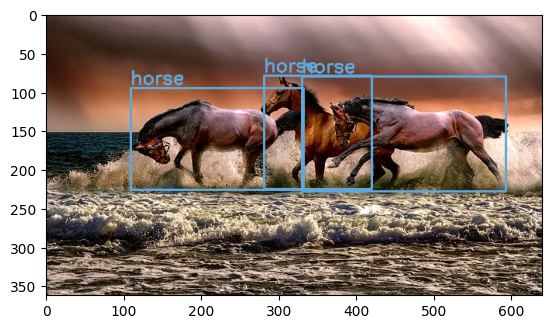

In [8]:
image = Image.open(images_ex[0])
boxes, classes, labels = predict(image,model,0.8)
image = draw_boxes(boxes,classes,labels,image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Image example 2:

Boxes: tensor([[ 838.5433,  332.5758,  931.5140,  610.5795],
        [ 239.9837,  161.4275,  428.7710,  689.3965],
        [1036.9299,  286.8641, 1157.1976,  602.9467],
        [ 717.9536,  406.3633,  778.8359,  582.7150],
        [ 490.6514,  387.5172,  557.0750,  598.9990],
        [ 763.2920,  406.0027,  822.7873,  584.4618],
        [ 607.7260,  386.1168,  668.4711,  599.6000],
        [ 455.9370,  406.9035,  505.5158,  590.1761],
        [ 572.1499,  407.7713,  618.9603,  594.5995],
        [ 654.3629,  416.0069,  703.9949,  587.2538],
        [ 375.1678,  346.2524,  469.9462,  622.2195],
        [ 184.6026,  191.5600,  311.4709,  613.8544],
        [ 465.8302,  440.2793,  504.8549,  503.2961],
        [ 869.5604,  368.8593,  919.9224,  474.9595],
        [ 685.4947,  444.7533,  713.3499,  519.0981],
        [1125.0425,  459.2548, 1160.8821,  500.1597],
        [1077.5970,  327.6360, 1087.3284,  336.4713],
        [ 585.1913,  392.8564,  639.9267,  600.1978],
        [ 582.6463,  

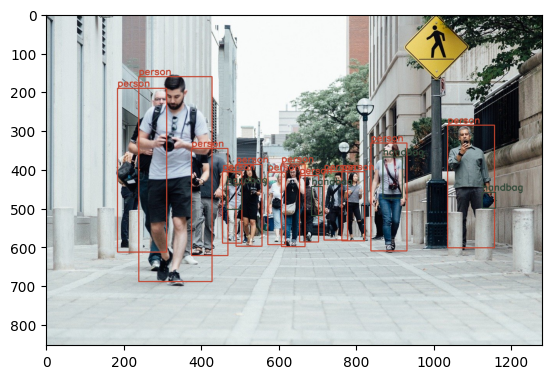

In [9]:
image = Image.open(images_ex[1])
boxes, classes, labels = predict(image,model,0.8)
image = draw_boxes(boxes,classes,labels,image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Image example 3:

Boxes: tensor([[5.8550e+02, 3.0679e+02, 7.6959e+02, 7.9109e+02],
        [6.1061e+02, 5.0469e+02, 7.7416e+02, 8.3717e+02],
        [3.5637e+02, 3.8366e+02, 4.2221e+02, 4.4126e+02],
        [3.7229e-01, 4.1606e+02, 2.8784e+01, 4.6788e+02],
        [5.5278e+02, 3.9554e+02, 5.7382e+02, 4.6087e+02],
        [2.5864e+01, 4.2121e+02, 6.5340e+01, 4.4425e+02],
        [8.1940e+02, 3.7355e+02, 8.4451e+02, 4.4950e+02],
        [1.5357e+02, 3.3876e+02, 4.9642e+02, 6.5111e+02],
        [1.3568e+02, 4.1083e+02, 1.4943e+02, 4.4751e+02],
        [9.4219e+02, 3.0277e+02, 9.6331e+02, 3.2791e+02],
        [6.9452e+01, 4.1938e+02, 1.1694e+02, 4.4502e+02],
        [2.4149e+01, 4.2302e+02, 4.6692e+01, 4.4643e+02],
        [1.1634e+03, 3.8943e+02, 1.2014e+03, 4.3058e+02],
        [1.1246e+03, 3.8154e+02, 1.1546e+03, 4.3327e+02],
        [1.0262e+03, 3.8537e+02, 1.0831e+03, 4.3714e+02],
        [7.7204e+02, 3.7843e+02, 7.9312e+02, 4.2867e+02],
        [1.0726e+03, 3.8711e+02, 1.1134e+03, 4.3559e+02],
       

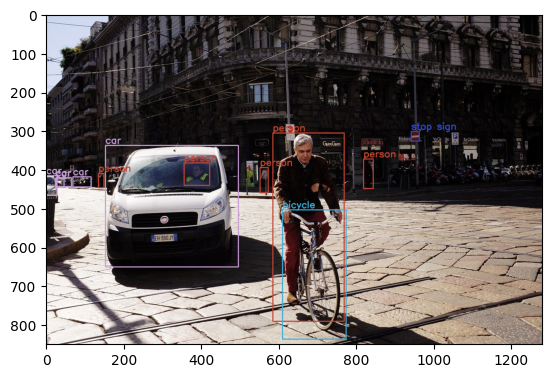

In [10]:
image = Image.open(images_ex[2])
boxes, classes, labels = predict(image,model,0.8)
image = draw_boxes(boxes,classes,labels,image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## YOLO

The pre-trained YOLO v5 model will be loaded here from ultralytics.

In [11]:
# Load pretrained Faster R-CNN model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

C:\Python310\lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\matth/.cache\torch\hub\master.zip


requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...


requirements: ❌ AutoUpdate skipped (offline)


YOLOv5  2024-3-19 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)



Fusing layers... 


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs


Adding AutoShape... 


### Results
Some images from ultralytics are loaded here to perform object detection on. 

In [12]:
# Load images    
image1 = cv2.imread('../../data/zidane.jpg')
image2 = cv2.imread('../../data/bus.jpg')

### Results
The YOLO v5 model is now used to perform object detection on the 2 downloaded image examples. Batch interference is used. The YOLO v5 model detects all the objects within the image. A bounding box is placed around the objects. These are annotated with the class name and probability.

image 1/2: 720x1280 2 persons, 1 tie
image 2/2: 1080x810 4 persons, 1 bus
Speed: 2.3ms pre-process, 40.7ms inference, 123.4ms NMS per image at shape (2, 3, 640, 640)


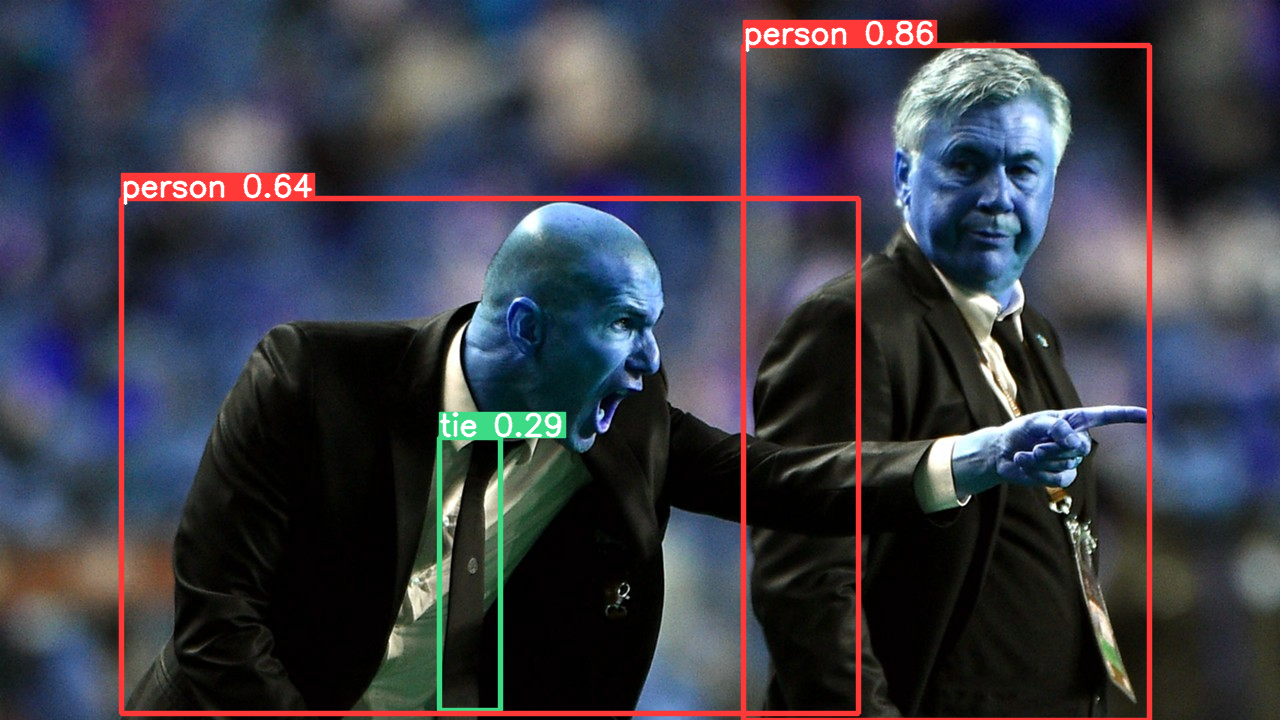

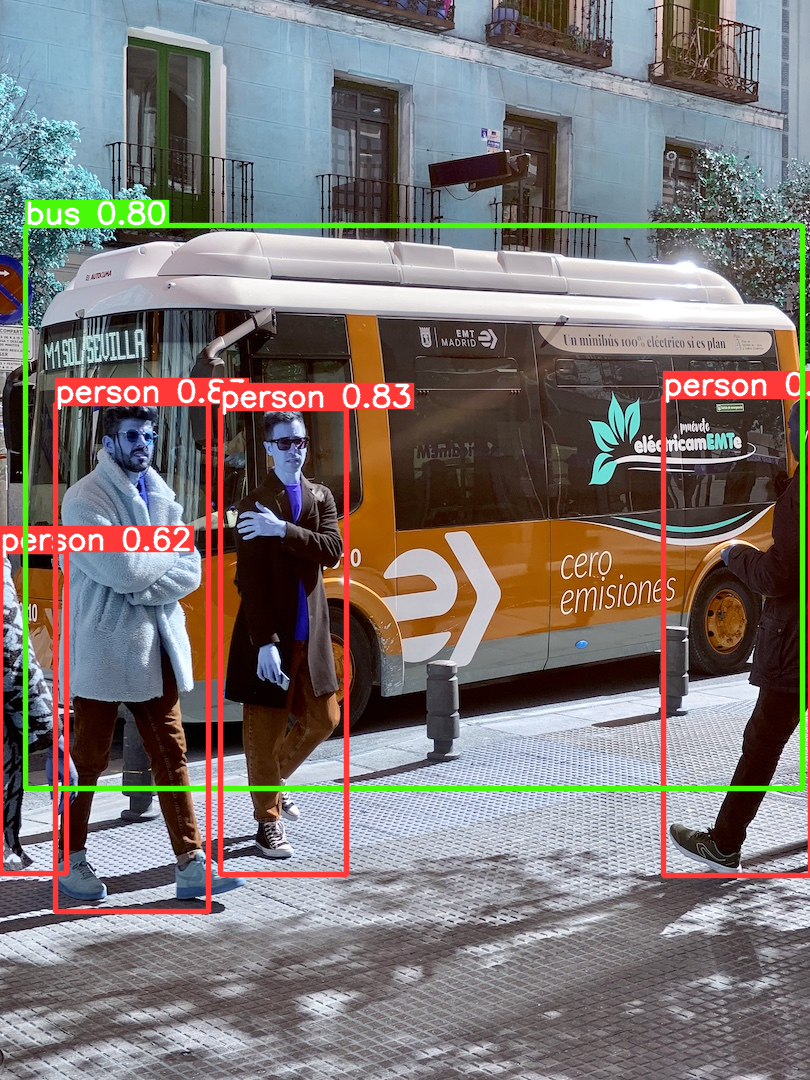

In [13]:
# Get predictions
results = model([image1, image2]) # size = batch of images
results.print()  
results.show()